In [1]:
import numpy as np
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import mean
from numpy import std
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directoryimport matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

AGEs.csv                         plot1.png
Tung 2021.11.14 (1).pptx         plot2.pdf
ages.ipynb                       plot2.png
ann.ipynb                        plot2_1.pdf
ann_kernel.ipynb                 polyfit_old.ipynb
boe-9-10-4998.pdf                raman-spectroscopy-project.ipynb
earLobe.csv                      raw_raman_spectroscopy
innerArm.csv                     scaling.py
logs                             thumbNail.csv
matlab_raman_preprocessed        transform.py
model.png                        vein.csv
plolyfit_ann.ipynb


In [3]:
earData = pd.read_csv('matlab_raman_preprocessed/earData.csv', header=None)

In [81]:
earData

array([[0.10954397, 0.17714156, 0.17362304, ..., 0.13712515, 0.13395767,
        0.13045868],
       [0.10925768, 0.17288461, 0.21402048, ..., 0.12197178, 0.11070996,
        0.10551877],
       [0.15903172, 0.19339266, 0.24109445, ..., 0.17050683, 0.17781694,
        0.09620156],
       ...,
       [1.43722658, 1.48411883, 1.5011353 , ..., 1.34272104, 1.36793152,
        1.32997901],
       [1.50098733, 1.59994337, 1.62892055, ..., 1.5210636 , 1.49379403,
        1.4924989 ],
       [1.3916479 , 1.48931646, 1.56752211, ..., 1.42915895, 1.41514094,
        1.38768072]])

In [5]:
earData = earData.to_numpy()

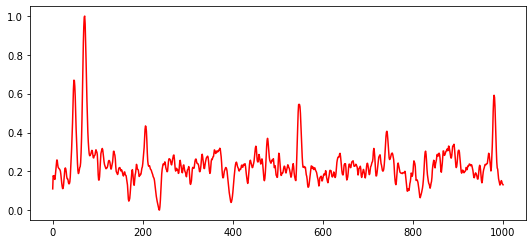

In [68]:
plt.plot(earData[0], c='red')

In [52]:
# Tensorflow
import tensorflow as tf

from tensorflow import keras
from keras.layers import Input, Dense, Dropout, Flatten
from keras.models import Sequential

# Metrics evaluator
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report

In [69]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [82]:
targets = pd.read_csv('earLobe.csv', header=None)
targets = targets[1][2:].to_numpy().astype('int')

In [79]:
inputs = earData
inputs.shape

(20, 1001)

In [39]:
input_shape = inputs.shape[1]
input_shape

1001

In [83]:
loss_function = 'binary_crossentropy'
optimizer = 'adam'
no_epochs = 100
verbosity = 1
batch_size = 32

In [36]:
acc_per_fold = []
loss_per_fold = []

In [73]:
test

array([ 0, 17])

In [84]:
fold_no = 1
for train, test in kf.split(inputs, targets):
    # Define the model architecture
    model = Sequential()
    model.add(Dense(14, activation='sigmoid', input_shape=earData.shape))
    model.add(Dense(1, activation='softmax'))

    # Compile the model
    model.compile(loss=loss_function,
                    optimizer=optimizer,
                    metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
  
    # Fit data to model
    history = model.fit(inputs[train], targets[train],
                batch_size=batch_size,
                epochs=no_epochs,
                verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100


2022-03-17 15:01:27.278582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 0.8441 - accuracy: 0.5556
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 0.6309 - accuracy: 0.5556
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.5131 - accuracy: 0.5556
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4839 - accuracy: 0.5556
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 0.4938 - accuracy: 0.5556
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 0.5095 - accuracy: 0.5556
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 0.5211 - accuracy: 0.5556
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5277 - accuracy: 0.5556
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5306 - accuracy: 0.5556
Epoch 10/100
1/1 [==============================] - 0s 47ms/step - loss: 0.5302 - accuracy: 0.5556
Epoch 11/100
1/1 [===============

2022-03-17 15:01:31.550666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score for fold 1: loss of 0.2382483184337616; accuracy of 50.0%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
1/1 [==============================] - 0s 353ms/step - loss: 0.6922 - accuracy: 0.5556
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5738 - accuracy: 0.5556
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5548 - accuracy: 0.5556
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5621 - accuracy: 0.5556
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5668 - accuracy: 0.5556
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5650 - accuracy: 0.5556
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5552 - accuracy: 0.5556


2022-03-17 15:01:32.390918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5406 - accuracy: 0.5556
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5238 - accuracy: 0.5556
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5061 - accuracy: 0.5556
Epoch 11/100
1/1 [==============================] - 0s 23ms/step - loss: 0.4897 - accuracy: 0.5556
Epoch 12/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4779 - accuracy: 0.5556
Epoch 13/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4726 - accuracy: 0.5556
Epoch 14/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4710 - accuracy: 0.5556
Epoch 15/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4675 - accuracy: 0.5556
Epoch 16/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4596 - accuracy: 0.5556
Epoch 17/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4495 - accuracy: 0.5556
Epoch 18/100
1/

2022-03-17 15:01:35.073350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 319ms/step - loss: 0.6605 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5315 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5047 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5023 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4971 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4907 - accuracy: 0.5000


2022-03-17 15:01:35.442846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4840 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4729 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.4559 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4370 - accuracy: 0.5000
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4202 - accuracy: 0.5000
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4068 - accuracy: 0.5000
Epoch 13/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3972 - accuracy: 0.5000
Epoch 14/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3912 - accuracy: 0.5000
Epoch 15/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3877 - accuracy: 0.5000
Epoch 16/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3845 - accuracy: 0.5000
Epoch 17/100
1/

2022-03-17 15:01:38.817283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/100


2022-03-17 15:01:39.359682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 889ms/step - loss: 0.6377 - accuracy: 0.5556
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5328 - accuracy: 0.5556
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5109 - accuracy: 0.5556
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5051 - accuracy: 0.5556
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5031 - accuracy: 0.5556
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4992 - accuracy: 0.5556
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4897 - accuracy: 0.5556
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.4790 - accuracy: 0.5556
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4684 - accuracy: 0.5556
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4571 - accuracy: 0.5556
Epoch 11/100
1/1 [============

2022-03-17 15:01:42.477743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/100
1/1 [==============================] - 0s 457ms/step - loss: 0.6795 - accuracy: 0.6111
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5898 - accuracy: 0.6111
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5973 - accuracy: 0.6111
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6019 - accuracy: 0.6111


2022-03-17 15:01:43.001389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5872 - accuracy: 0.6111
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5626 - accuracy: 0.6111
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5414 - accuracy: 0.6111
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5298 - accuracy: 0.6111
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5250 - accuracy: 0.6111
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5189 - accuracy: 0.6111
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5056 - accuracy: 0.6111
Epoch 12/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4894 - accuracy: 0.6111
Epoch 13/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4776 - accuracy: 0.6111
Epoch 14/100
1/1 [==============================] - 0s 24ms/step - loss: 0.4712 - accuracy: 0.6111
Epoch 15/100
1/

2022-03-17 15:01:46.154016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/100


2022-03-17 15:01:46.631162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 519ms/step - loss: 0.8892 - accuracy: 0.5556
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.8393 - accuracy: 0.5556
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8262 - accuracy: 0.5556
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8018 - accuracy: 0.5556
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7708 - accuracy: 0.5556
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7453 - accuracy: 0.5556
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7290 - accuracy: 0.5556
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7101 - accuracy: 0.5556
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6854 - accuracy: 0.5556
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6619 - accuracy: 0.5556
Epoch 11/100
1/1 [============

2022-03-17 15:01:48.990319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


2022-03-17 15:01:49.452657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 655ms/step - loss: 0.8545 - accuracy: 0.5556
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 0.7919 - accuracy: 0.5556
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 0.7665 - accuracy: 0.5556
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7420 - accuracy: 0.5556
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.7177 - accuracy: 0.5556
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6964 - accuracy: 0.5556
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6804 - accuracy: 0.5556
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6634 - accuracy: 0.5556
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6417 - accuracy: 0.5556
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6193 - accuracy: 0.5556
Epoch 11/100
1/1 [============

2022-03-17 15:01:52.412803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Score for fold 7: loss of 0.2169765681028366; accuracy of 50.0%
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/100
1/1 [==============================] - 0s 429ms/step - loss: 0.6859 - accuracy: 0.5556
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6569 - accuracy: 0.5556


2022-03-17 15:01:52.946707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6403 - accuracy: 0.5556
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6260 - accuracy: 0.5556
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6133 - accuracy: 0.5556
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6018 - accuracy: 0.5556
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5900 - accuracy: 0.5556
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5786 - accuracy: 0.5556
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5691 - accuracy: 0.5556
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5615 - accuracy: 0.5556
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5547 - accuracy: 0.5556
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5481 - accuracy: 0.5556
Epoch 13/100
1/1 

2022-03-17 15:01:55.438057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 363ms/step - loss: 0.7464 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7169 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7019 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6841 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6655 - accuracy: 0.5000


2022-03-17 15:01:55.851724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6295 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6157 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6031 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5903 - accuracy: 0.5000
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5773 - accuracy: 0.5000
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5651 - accuracy: 0.5000
Epoch 13/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5540 - accuracy: 0.5000
Epoch 14/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5439 - accuracy: 0.5000
Epoch 15/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5344 - accuracy: 0.5000
Epoch 16/100
1/1

2022-03-17 15:01:58.036631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 327ms/step - loss: 0.8550 - accuracy: 0.5556
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7688 - accuracy: 0.5556
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7245 - accuracy: 0.5556
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7060 - accuracy: 0.5556


2022-03-17 15:01:58.400836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6916 - accuracy: 0.5556
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6766 - accuracy: 0.5556
Epoch 7/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6575 - accuracy: 0.5556
Epoch 8/100
1/1 [==============================] - 0s 159ms/step - loss: 0.6358 - accuracy: 0.5556
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6152 - accuracy: 0.5556
Epoch 10/100
1/1 [==============================] - 0s 56ms/step - loss: 0.5973 - accuracy: 0.5556
Epoch 11/100
1/1 [==============================] - 0s 31ms/step - loss: 0.5828 - accuracy: 0.5556
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5729 - accuracy: 0.5556
Epoch 13/100
1/1 [==============================] - 0s 24ms/step - loss: 0.5675 - accuracy: 0.5556
Epoch 14/100
1/1 [==============================] - 0s 22ms/step - loss: 0.5634 - accuracy: 0.5556
Epoch 15/100
1

2022-03-17 15:02:01.427477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1